In [1]:
# Install necessary libraries (if not already installed)
!pip install opencv-python-headless matplotlib numpy


Processing Grayscale Image...


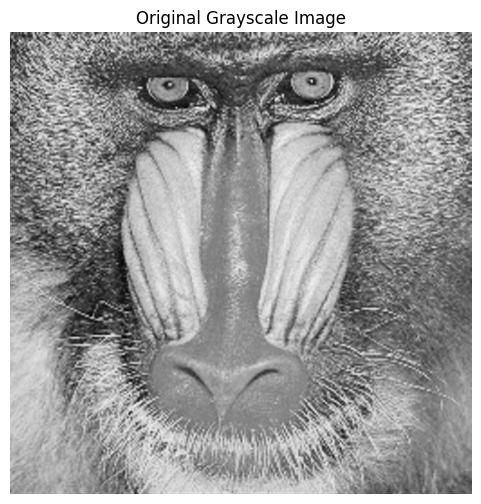

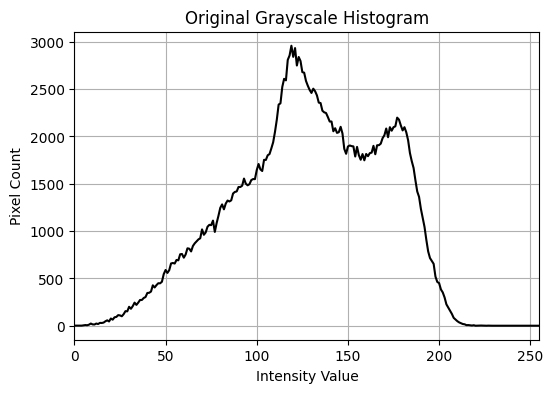

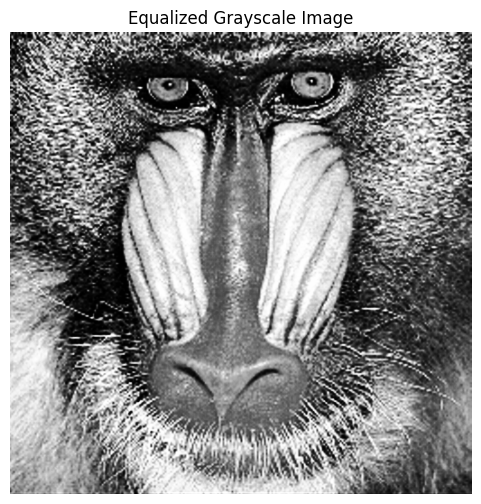

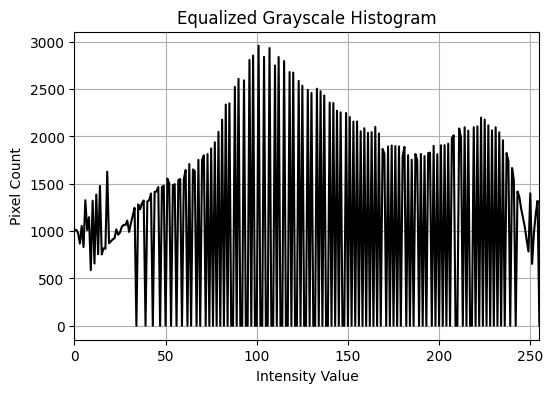


Processing Color Image...


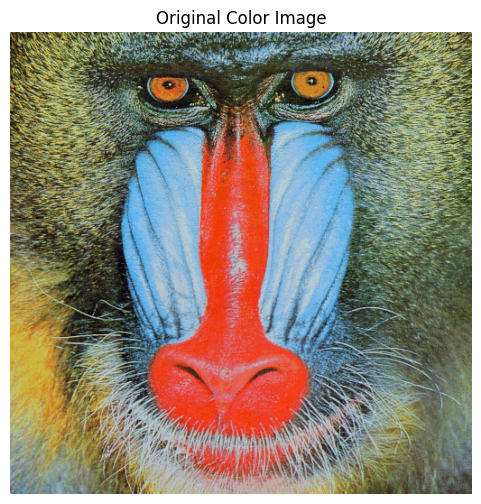

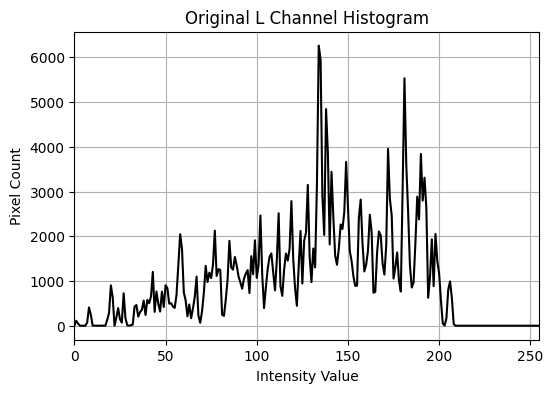

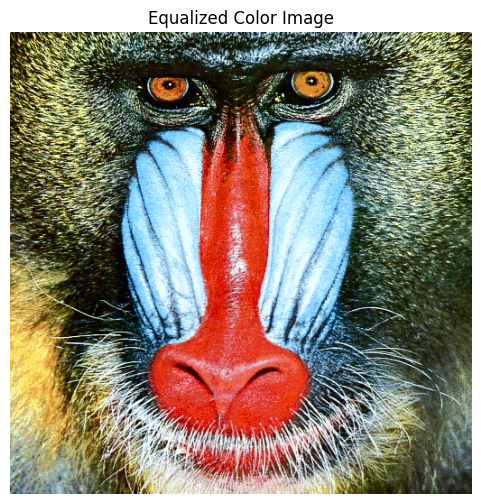

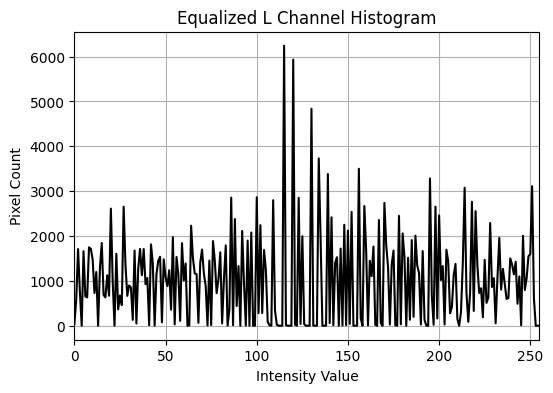

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to manually calculate histogram for grayscale images
def calculate_histogram_gray(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

# Function to manually calculate histogram for the L channel in LAB images
def calculate_histogram_lab_L(image_lab):
    L_channel = image_lab[:, :, 0]
    histogram = np.zeros(256, dtype=int)
    for pixel in L_channel.ravel():
        histogram[pixel] += 1
    return histogram

# Function to plot histogram
def plot_histogram(histogram, title, color='black'):
    plt.figure(figsize=(6, 4))
    plt.plot(histogram, color=color)
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.xlim([0, 255])
    plt.grid(True)
    plt.show()

# Function to perform histogram equalization manually for grayscale images
def equalize_grayscale(image):
    hist = calculate_histogram_gray(image)
    cdf = hist.cumsum()
    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    # Map the original gray levels to equalized levels
    equalized_image = cdf_normalized[image]
    return equalized_image

# Function to perform histogram equalization on the L channel of LAB images
def equalize_lab_L(image_bgr):
    # Convert BGR to LAB
    image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)
    L_channel = image_lab[:, :, 0]

    # Calculate histogram and CDF for L channel
    hist = calculate_histogram_lab_L(image_lab)
    cdf = hist.cumsum()
    cdf_min = cdf.min()
    cdf_max = cdf.max()

    # Normalize the CDF
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
    cdf_normalized = cdf_normalized.astype('uint8')

    # Map the original L channel to equalized L channel
    equalized_L = cdf_normalized[L_channel]

    # Replace the L channel in LAB image
    image_lab[:, :, 0] = equalized_L

    # Convert LAB back to BGR
    equalized_bgr = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)
    return equalized_bgr, L_channel, equalized_L

# Function to display images using matplotlib
def show_image_matplotlib(image, title, cmap=None):
    # Convert BGR to RGB for displaying correctly with matplotlib
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to process grayscale image
def process_grayscale_image(image_path):
    # Load grayscale image
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image_gray is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Display original grayscale image
    show_image_matplotlib(image_gray, "Original Grayscale Image", cmap='gray')

    # Calculate and plot original histogram
    hist_original = calculate_histogram_gray(image_gray)
    plot_histogram(hist_original, "Original Grayscale Histogram")

    # Perform histogram equalization
    equalized_gray = equalize_grayscale(image_gray)

    # Display equalized grayscale image
    show_image_matplotlib(equalized_gray, "Equalized Grayscale Image", cmap='gray')

    # Calculate and plot equalized histogram
    hist_equalized = calculate_histogram_gray(equalized_gray)
    plot_histogram(hist_equalized, "Equalized Grayscale Histogram")

    return image_gray, equalized_gray

# Function to process color image
def process_color_image(image_path):
    # Load color image
    image_color = cv2.imread(image_path)
    if image_color is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Display original color image
    show_image_matplotlib(image_color, "Original Color Image")

    # Calculate and plot original histogram for L channel
    image_lab = cv2.cvtColor(image_color, cv2.COLOR_BGR2LAB)
    L_original = image_lab[:, :, 0]
    hist_original = calculate_histogram_lab_L(image_lab)
    plot_histogram(hist_original, "Original L Channel Histogram", color='black')

    # Perform histogram equalization on L channel
    equalized_color, L_channel_before, L_channel_after = equalize_lab_L(image_color)

    # Display equalized color image
    show_image_matplotlib(equalized_color, "Equalized Color Image")

    # Calculate and plot equalized histogram for L channel
    hist_equalized = calculate_histogram_lab_L(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2LAB))
    plot_histogram(hist_equalized, "Equalized L Channel Histogram", color='black')

    return image_color, equalized_color

# Main function
def main():
    # Define image paths
    gray_image_path = '/content/mandril_gray.jpg'  # Change this to your grayscale image path
    color_image_path = '/content/mandril_color.jpg'  # Change this to your color image path

    # Process Grayscale Image
    print("\nProcessing Grayscale Image...")
    process_grayscale_image(gray_image_path)

    # Process Color Image
    print("\nProcessing Color Image...")
    process_color_image(color_image_path)

# Execute main function
if __name__ == "__main__":
    main()


In [7]:
!pip install opencv-python scikit-image matplotlib

In [8]:
from skimage.exposure import match_histograms

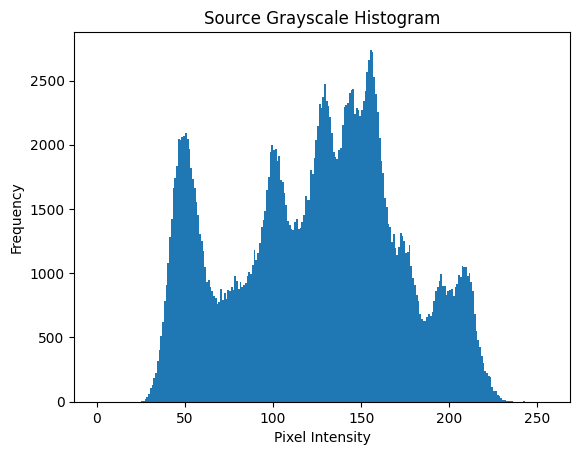

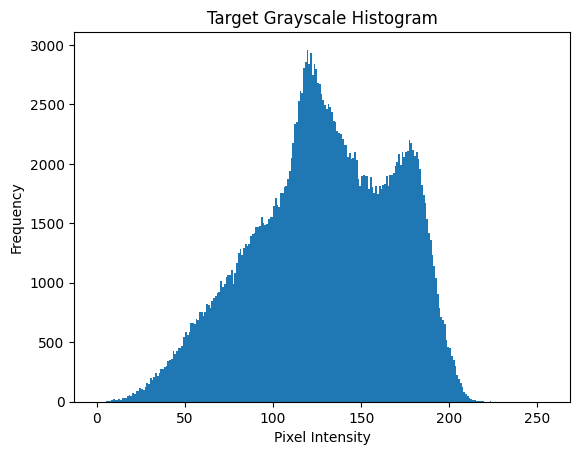

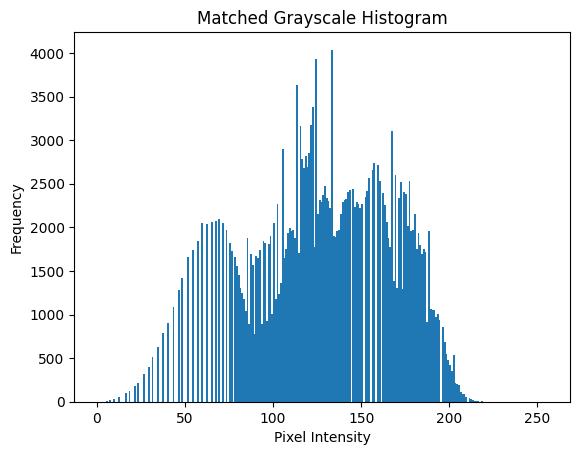

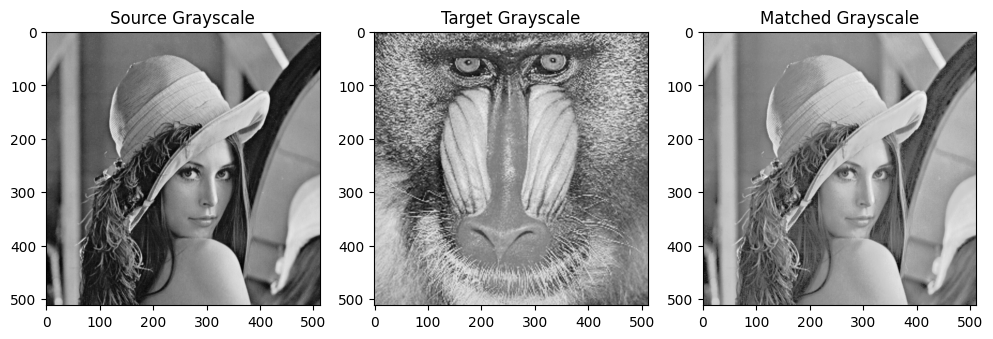

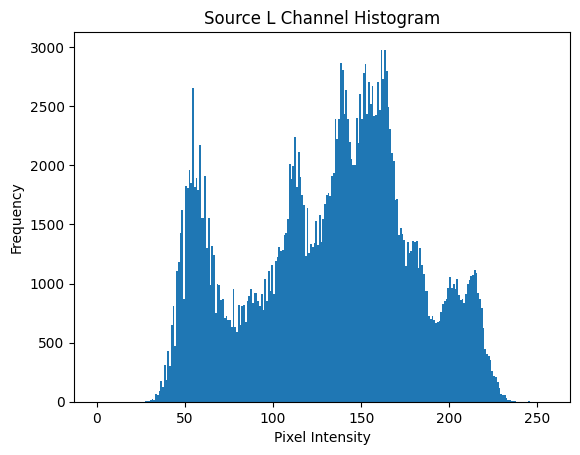

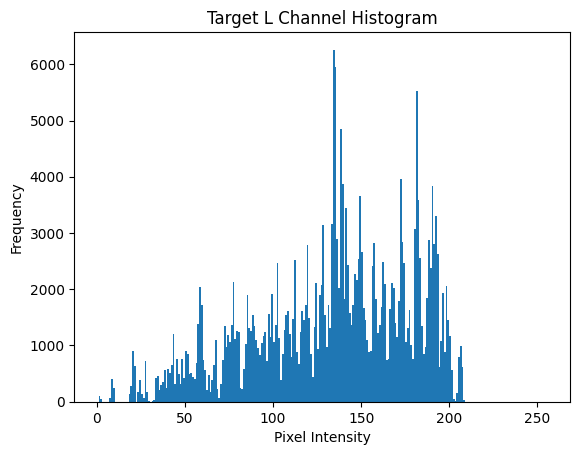

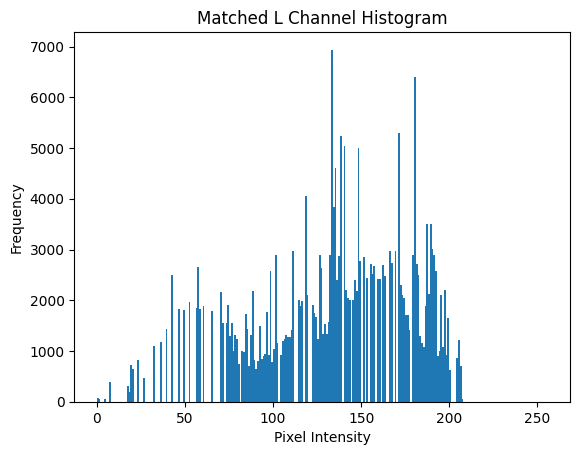

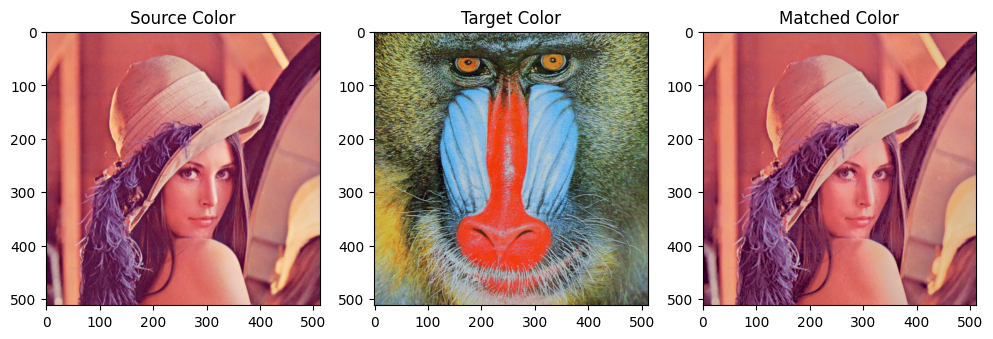

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Helper function to plot histograms
def plot_histogram1(image, title):
    plt.figure()
    plt.title(title)
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Histogram Matching function for grayscale images
def match_histogram_grayscale(source, target):
    # Perform histogram matching
    matched = exposure.match_histograms(source, target, channel_axis=None)

    # Plot histograms of source, target, and matched images
    plot_histogram1(source, "Source Grayscale Histogram")
    plot_histogram1(target, "Target Grayscale Histogram")
    plot_histogram1(matched, "Matched Grayscale Histogram")

    return matched

# Convert RGB to LAB, match histograms on L channel
def match_histogram_color(source_color, target_color):
    # Convert RGB images to LAB
    source_lab = cv2.cvtColor(source_color, cv2.COLOR_RGB2LAB)
    target_lab = cv2.cvtColor(target_color, cv2.COLOR_RGB2LAB)

    # Split LAB channels
    source_l, source_a, source_b = cv2.split(source_lab)
    target_l, target_a, target_b = cv2.split(target_lab)

    # Perform histogram matching only on the L (lightness) channel
    matched_l = exposure.match_histograms(source_l, target_l, channel_axis=None)

    # Convert the matched L channel to the same data type as the original A and B channels (uint8)
    matched_l = np.clip(matched_l, 0, 255).astype(np.uint8)

    # Merge the matched L channel back with original A and B channels
    matched_lab = cv2.merge((matched_l, source_a, source_b))

    # Convert LAB back to RGB
    matched_color = cv2.cvtColor(matched_lab, cv2.COLOR_LAB2RGB)

    # Plot histograms of L channel
    plot_histogram1(source_l, "Source L Channel Histogram")
    plot_histogram1(target_l, "Target L Channel Histogram")
    plot_histogram1(matched_l, "Matched L Channel Histogram")

    return matched_color

# Load the grayscale and color images
def load_image(image_path, is_gray=False):
    if is_gray:
        return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Display images
def display_images(source, target, matched, title="Image"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(source, cmap='gray' if len(source.shape) == 2 else None)
    plt.title(f"Source {title}")

    plt.subplot(1, 3, 2)
    plt.imshow(target, cmap='gray' if len(target.shape) == 2 else None)
    plt.title(f"Target {title}")

    plt.subplot(1, 3, 3)
    plt.imshow(matched, cmap='gray' if len(matched.shape) == 2 else None)
    plt.title(f"Matched {title}")

    plt.show()

# Main function to run histogram matching
def run_histogram_matching(source_gray_path, target_gray_path, source_color_path, target_color_path):
    # Load images
    source_gray = load_image(source_gray_path, is_gray=True)
    target_gray = load_image(target_gray_path, is_gray=True)

    source_color = load_image(source_color_path, is_gray=False)
    target_color = load_image(target_color_path, is_gray=False)

    # Perform histogram matching for grayscale images
    matched_gray = match_histogram_grayscale(source_gray, target_gray)
    display_images(source_gray, target_gray, matched_gray, title="Grayscale")

    # Perform histogram matching for color images (RGB -> LAB -> match L channel)
    matched_color = match_histogram_color(source_color, target_color)
    display_images(source_color, target_color, matched_color, title="Color")

# Paths to the images (replace with your own paths in Google Colab)
source_gray_path = '/content/lena_gray_512.jpg'
target_gray_path = '/content/mandril_gray.jpg'
source_color_path = '/content/lena_color_512.jpg'
target_color_path = '/content/mandril_color.jpg'

# Run the histogram matching
run_histogram_matching(source_gray_path, target_gray_path, source_color_path, target_color_path)
